**Load the required libraries and data**

In [1]:
# Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
# Data  
appointment_df = pd.read_csv("../data/Appointments List.csv", 
                             encoding='UTF-16', delimiter="\t")
plp_df = pd.read_csv("../data/PLP Patient Lifetime Profile.csv",
                     encoding='UTF-16', delimiter="\t")

/tmp/ipykernel_83566/4214281181.py:2: DtypeWarning: Columns (0,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  appointment_df = pd.read_csv("../data/Appointments List.csv",


# Explanatory Data Analysis
## Data Preparation

In [3]:
plp_df.head()

,Patient FID,ChartNumber,ZipCode (tmtPLPPatientLifeTimeProfile),CreatedDate,First Date Of Service,Last Date Of Service,Last Primary Appt Type Group,Last Facility City,Days Since Last DoS dim,Next Scheduled Appt Date,...,Total Insurance Payments,Total Patient Payments,Total Writeoff Amount,Charge Code Count,Diagnosis Code Count,Vists / Months Span,OutstandingAR,Count of tmtPLPPatientLifeTimeProfile,SeenProvidersCount,PatientsWithVisit%
0,Grand Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,"$1,240,855.95","$14,861,653.28","$995,613.48","8,024","3,473","6,599.64","$1,388,296.81","1,602",0,99.94%
1,5283,1,02139,01/22/18,01/22/18,05/29/18,TMS,CAMBRIDGE,2366,NaN,...,"$6,147.36","$3,464.68","$6,187.96",4,1,12.75,"$6,147.36",1,0,100.00%
2,5286,2,02118,01/23/18,01/16/18,06/27/18,MH Infusion,CAMBRIDGE,2337,NaN,...,NaN,"$4,450.00",NaN,2,1,2.60,$0.00,1,0,100.00%
3,5287,3,02474,01/23/18,01/29/18,02/13/18,MH Infusion,CAMBRIDGE,2471,NaN,...,NaN,"$3,400.00",NaN,2,1,7.00,$0.00,1,0,100.00%
4,5347,5,02127,01/23/18,01/25/18,03/27/18,MH Infusion,CAMBRIDGE,2429,NaN,...,NaN,"$3,900.00",NaN,2,1,4.50,$0.00,1,0,100.00%


In [4]:
# Drop the first row
plp_df.drop(index=0, inplace=True)
plp_df.reset_index(drop=True, inplace=True)

In [5]:
plp_df["ChartNumber"] = pd.to_numeric(plp_df["ChartNumber"], errors="coerce")

In [6]:
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,Grand Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,"55,975",*
1,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
2,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
3,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
4,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"


In [7]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Appointment UID           55976 non-null  object
 1   Appt Status Description   55976 non-null  object
 2   Date Of Service           37250 non-null  object
 3   Chartnumber               55975 non-null  object
 4   NurseName                 19321 non-null  object
 5   FirstTreatmentApptInd     54678 non-null  object
 6   Appt Type Group           54678 non-null  object
 7   Appt Type                 54677 non-null  object
 8   Created By                55976 non-null  object
 9   Provider                  55976 non-null  object
 10  Facility City             51738 non-null  object
 11  Room                      55976 non-null  object
 12  Column Heading            54697 non-null  object
 13  #                         55976 non-null  object
 14  Count of tblAppointmen

In [8]:
# Drop the first two rows 
appointment_df.drop(index=[0, 1], inplace=True)

In [9]:
appointment_df["Chartnumber"] = pd.to_numeric(appointment_df["Chartnumber"], errors="coerce")
appointment_df["Date"] = pd.to_datetime(appointment_df["Date Of Service"], errors="coerce")

/tmp/ipykernel_83566/2432676088.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appointment_df["Date"] = pd.to_datetime(appointment_df["Date Of Service"], errors="coerce")


In [10]:
# Replace "Made" with "Seen"
appointment_df["Appt Status Description"].replace(to_replace="Made", value="Seen", inplace=True)

In [11]:
appointment_df["Facility City"].isna().sum()

4237

In [12]:
appointment_df["Facility City"] = appointment_df["Facility City"].ffill().backfill()

/tmp/ipykernel_83566/1807988571.py:1: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  appointment_df["Facility City"] = appointment_df["Facility City"].ffill().backfill()


In [13]:
# Confirm if there are still null values
appointment_df["Facility City"].isna().sum()

0

In [14]:
# Select the successfull appointments(visits)
seen_df = appointment_df[appointment_df["Appt Status Description"]=="Seen"]

# subset the data set 
subset_columns = ["Date", "Chartnumber", "Appt Type Group", "Facility City"]
seen_df = seen_df[subset_columns]

# Drop any record with null values 
seen_df.dropna(how="any", inplace=True)

In [15]:
# Calculate the percentage of patients who start with intake 
count = 0
chart_numbers = seen_df["Chartnumber"].unique()

for chart_no in chart_numbers:
    # Filter the data set 
    df_by_chart_no = seen_df[seen_df["Chartnumber"]==chart_no].sort_values(by="Date")
    df_by_chart_no.reset_index(drop=True, inplace=True)
    
    if df_by_chart_no["Appt Type Group"][0]=="Intake":
        count+=1
    else:
        pass
    
# Patients enrolled with an intake    
count/seen_df["Chartnumber"].nunique()

0.8556767158434894

approximately 86% of the patients enrolled with an intake instead of treatment or follow up

Features/Variables to include in the post intake dataset 

* Chart number 
* First Service after enrollment
* First Service after intake
* Days after intake
* Days between MH Infusion and Intake 
* Number of visits
* Number of MH infusions

* Number of MH infusions outside cambridge 
* Number of visits outside cambridge

In [16]:
first_service_after_enrollment = []
first_service_after_intake = []
days_after_intake = []
days_btn_mhinfusion_intake = []
visit_count = []
mhInfusion_count = []

# Additional Modifications
infusion_count_outside_cambridge = []
visit_count_outside_cambridge = []
intake_facility_city = []



for chart_no in chart_numbers:
    # Filter the data set by chart number
    df_by_chart_no = seen_df[seen_df["Chartnumber"]==chart_no].sort_values(by="Date")
    df_by_chart_no.reset_index(drop=True, inplace=True)
    
    # Get the required data 
    first_service_after_enrollment.append(df_by_chart_no["Appt Type Group"][0])
    visit_count.append(df_by_chart_no.shape[0])
    mhInfusion_count.append(df_by_chart_no["Appt Type Group"].to_list().count('MH Infusion'))
    
    # Get the additional data 
    ## Filter out Cambridge visits from the data
    outside_cambridge_df = df_by_chart_no[df_by_chart_no["Facility City"]!="CAMBRIDGE"]
    visit_count_outside_cambridge.append(outside_cambridge_df.shape[0])
    
    ## Count the number of infusions outside cambridge
    infusion_count_outside_cambridge.append(outside_cambridge_df["Appt Type Group"].tolist().count('MH Infusion'))
    
    if df_by_chart_no["Appt Type Group"].tolist()[0] == "Intake":
        # Check if there exists multiple services
        if df_by_chart_no.shape[0] > 1:
            first_service_after_intake.append(df_by_chart_no["Appt Type Group"][1])

            # Calculate days after intake
            days_1 = (df_by_chart_no["Date"][1] - df_by_chart_no["Date"][0]).days
            days_after_intake.append(days_1)
            
            # Get the intake facility city 
            intake_facility_city.append(df_by_chart_no["Facility City"][0])

            # Calculate days between intake and MH infusion
            try:
                mhInfusion_index = df_by_chart_no["Appt Type Group"].tolist().index('MH Infusion')
                days_2 = (df_by_chart_no["Date"][mhInfusion_index] - df_by_chart_no["Date"][0]).days
                days_btn_mhinfusion_intake.append(days_2)
            except ValueError: 
                days_btn_mhinfusion_intake.append(np.nan)        
        
        # The service only includes intake
        else:
            
            intake_facility_city.append(df_by_chart_no["Facility City"][0])
            
            first_service_after_intake.append(np.nan)
            days_after_intake.append(np.nan)
            days_btn_mhinfusion_intake.append(np.nan)
        
    else: 
        # Intake exists  
        if "Intake" in df_by_chart_no["Appt Type Group"].tolist():
            # Note the intake index
            intake_index = df_by_chart_no["Appt Type Group"].tolist().index("Intake")
                
            try:
                first_service_after_intake.append(df_by_chart_no["Appt Type Group"].tolist()[intake_index + 1])
                
                # Get the intake facility city
                intake_facility_city.append(df_by_chart_no["Facility City"][intake_index])
    
                # Calculate days after intake
                days_1 = (df_by_chart_no["Date"][intake_index + 1] - df_by_chart_no["Date"][intake_index]).days
                days_after_intake.append(days_1)
                
                # Calculate days between intake and MH infusion
                try:
                    mhInfusion_index = df_by_chart_no["Appt Type Group"].tolist().index('MH Infusion')
                    days_2 = (df_by_chart_no["Date"][mhInfusion_index] - df_by_chart_no["Date"][0]).days
                    days_btn_mhinfusion_intake.append(days_2)
                except ValueError: 
                    days_btn_mhinfusion_intake.append(np.nan) 
                    
            # if intake is the last service just insert a null value
            except IndexError:
                # Get the intake facility city
                intake_facility_city.append(df_by_chart_no["Facility City"][intake_index])
                
                first_service_after_intake.append(np.nan)
                days_after_intake.append(np.nan)
                days_btn_mhinfusion_intake.append(np.nan)
            
        else: 
            # Get the intake facility city
            intake_facility_city.append(np.nan)
        
            first_service_after_intake.append(np.nan)
            days_after_intake.append(np.nan)
            days_btn_mhinfusion_intake.append(np.nan)

In [17]:
# Create the dataframe 
post_intake_df = pd.DataFrame({
    "Chartnumber":chart_numbers,
    "First post-enrollment service": first_service_after_enrollment,
    "First post-intake service": first_service_after_intake,
    "Post-intake days": days_after_intake,
    "Days btn MHinfusion and Intake": days_btn_mhinfusion_intake,
    "Visits": visit_count,
    "MH infusions": mhInfusion_count, 
    "infusions outside Cambridge":infusion_count_outside_cambridge,
    "Visits outside Cambridge": visit_count_outside_cambridge,
    "Intake Facility City": intake_facility_city
})

In [18]:
post_intake_df.head()

,Chartnumber,First post-enrollment service,First post-intake service,Post-intake days,Days btn MHinfusion and Intake,Visits,MH infusions,infusions outside Cambridge,Visits outside Cambridge,Intake Facility City
0,1,Intake,TMS,14.0,NaN,49,0,0,0,CAMBRIDGE
1,2,MH Infusion,NaN,NaN,NaN,8,8,0,0,NaN
2,9,Intake,TMS,9.0,66.0,68,30,0,0,CAMBRIDGE
3,6,Intake,MH Infusion,0.0,0.0,16,13,0,0,CAMBRIDGE
4,12,Intake,NaN,NaN,NaN,1,0,0,0,CAMBRIDGE


In [19]:
post_intake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chartnumber                     1559 non-null   int64  
 1   First post-enrollment service   1559 non-null   object 
 2   First post-intake service       1137 non-null   object 
 3   Post-intake days                1137 non-null   float64
 4   Days btn MHinfusion and Intake  945 non-null    float64
 5   Visits                          1559 non-null   int64  
 6   MH infusions                    1559 non-null   int64  
 7   infusions outside Cambridge     1559 non-null   int64  
 8   Visits outside Cambridge        1559 non-null   int64  
 9   Intake Facility City            1343 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 121.9+ KB


## Patient Segmentation 
Will segment the patients into four segments from the PLP data set; 

- before mid-2023 patients 
- late 2023 patients 
- 2024 patients 
- all-time patients 

In [20]:
def segment_patients(first_day, last_day): 
    """
    Docstring 
    This function will segment patients into different four segments 
        - `before mid-2023` category 
        - `late 2023` category
        - `2024` category
        - `all-time` category
        
    This based on their first and last date. 
    """
    mid_2023 = pd.to_datetime("2023-07-01")
    start_2024 = pd.to_datetime("2024-01-01")
    
    first_day = pd.to_datetime(first_day, errors="coerce")
    last_day = pd.to_datetime(last_day, errors="coerce")
    
    segment = "Unknown"
    
    try:
        if last_day < mid_2023:
            segment = "before mid-2023"
        elif first_day >= mid_2023 and last_day < start_2024:
            segment = "late 2023"
        elif first_day >= start_2024:
            segment = "2024"
        elif first_day < mid_2023 and last_day >= mid_2023:
            segment = "all-time"
    
    except UnboundLocalError:
        print(i)
        
    return segment
    

In [21]:
patients_category = []

for i in range(len(plp_df)):
    category = segment_patients(plp_df['First Date Of Service'][i], plp_df['Last Date Of Service'][i])
    patients_category.append(category)
    
# Add the category as a column to the PLP data set
plp_df["Patient category"] = patients_category

# Select the required variables 
plp_df = plp_df[["ChartNumber", "Patient category"]]

# Review the operation
plp_df.head()

,ChartNumber,Patient category
0,1,before mid-2023
1,2,before mid-2023
2,3,before mid-2023
3,5,before mid-2023
4,6,before mid-2023


In [22]:
# Merge with the post_intake data set 
df = post_intake_df.merge(plp_df, left_on = "Chartnumber", right_on="ChartNumber")
df.drop("ChartNumber", axis=1, inplace=True)

# Fill null spaces in the city
df["Intake Facility City"] = df["Intake Facility City"].ffill().backfill()

## Set intake facility city to others if not cambridge 
df["Intake Facility City"] = df["Intake Facility City"].apply(lambda x: x if x == 'CAMBRIDGE' else 'OTHER')

df.head()

/tmp/ipykernel_83566/3137524295.py:6: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df["Intake Facility City"] = df["Intake Facility City"].ffill().backfill()


,Chartnumber,First post-enrollment service,First post-intake service,Post-intake days,Days btn MHinfusion and Intake,Visits,MH infusions,infusions outside Cambridge,Visits outside Cambridge,Intake Facility City,Patient category
0,1,Intake,TMS,14.0,NaN,49,0,0,0,CAMBRIDGE,before mid-2023
1,2,MH Infusion,NaN,NaN,NaN,8,8,0,0,CAMBRIDGE,before mid-2023
2,9,Intake,TMS,9.0,66.0,68,30,0,0,CAMBRIDGE,before mid-2023
3,6,Intake,MH Infusion,0.0,0.0,16,13,0,0,CAMBRIDGE,before mid-2023
4,12,Intake,NaN,NaN,NaN,1,0,0,0,CAMBRIDGE,before mid-2023


## Data Analysis and Visualization

Ideas to be analyzed.

* Rate of MH infusions compared to visit(infusions/visits) according to category - are people considering other forms of treatment? 
* Post intake days and days between MHinfusion and Intake per category(analyzed together) - delays for other services vs infusions delays
* Are people considering other facilities other than Cambridge? Are they specifically for MH infusions? 
    
    * Visits outside cambridge and infusions outside cambridge 
    * What facility cities do intakes occur per each patient category
    
* More to come ...

**Are people consider other forms of treatment?**

In [23]:
df["MH_Infusions_Per_Visit"] = df["MH infusions"]/df["Visits"]

In [24]:
df[["MH_Infusions_Per_Visit", "Patient category"]].groupby("Patient category").mean()

,MH_Infusions_Per_Visit
Patient category,
2024,0.534335
Unknown,0.514272
all-time,0.611187
before mid-2023,0.479138
late 2023,0.366647


- got nothing worth impressive here 

**Delays for other services vs infusions delays**

- These two cannot be compared coz infusion will be generally later than all services. We will focus on the segments 

<Axes: xlabel='Patient category', ylabel='Days btn MHinfusion and Intake'>

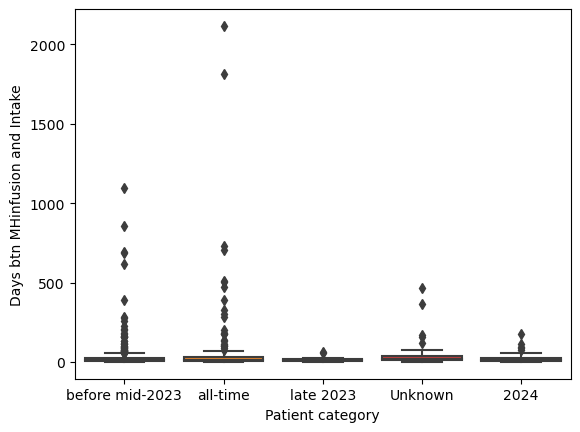

In [25]:
select_vars = ["Post-intake days", "Days btn MHinfusion and Intake", "Patient category"]

select_df = df[select_vars]

# Plot the dataset 
## Post Intake days 
# sns.boxplot(x="Patient category", y="Post-intake days", data=df)

## Days between MH infusion and intake 
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", data=df)


We will;

- select the required columns
- remove the outliers and plot boxplot to show how it compares 

In [26]:
def remove_outliers(df, variable):
    """
    Docstring
    This function will remove the outliers from the variable in the data set
    - Uses the IQR method 
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[variable].quantile(0.25)  # 25th percentile
    Q3 = df[variable].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

<Axes: xlabel='Patient category', ylabel='Post-intake days'>

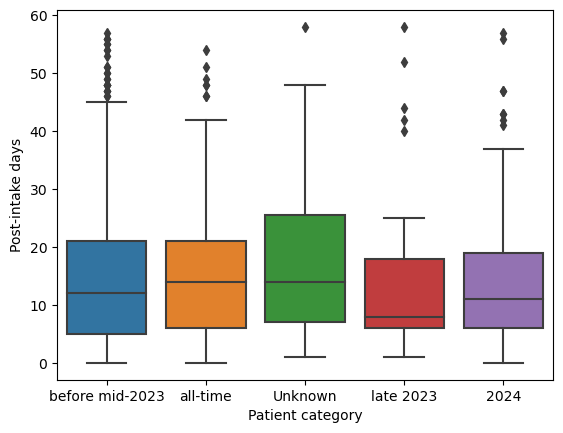

In [27]:
# Post intake days 
## Select the required columns 
selected_columns = ["Patient category", "Post-intake days"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Post-intake days")

## Plotting 
sns.boxplot(x="Patient category", y="Post-intake days", data=select_df)

- Late 2023 and 2024 patients had services closer to intake than other categories though it was minimal

<Axes: xlabel='Patient category', ylabel='Days btn MHinfusion and Intake'>

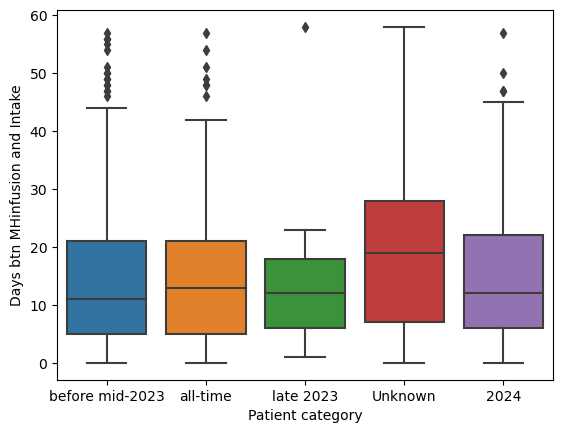

In [28]:
# Days between MH infusion and intake 
## Select the required columns 
selected_columns = ["Patient category", "Days btn MHinfusion and Intake"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Days btn MHinfusion and Intake")

## Plotting 
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", data=select_df)

- No notable difference here

What are the delays between Cambridge and other facilities? - Also an important point to check on.

<Axes: xlabel='Patient category', ylabel='Post-intake days'>

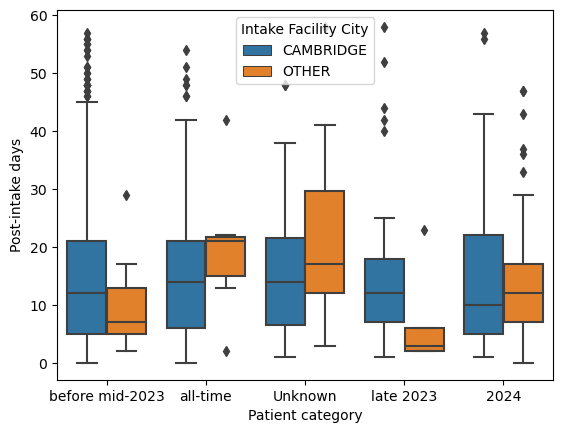

In [32]:
# Prepare the data 
## Select the required variables 
select_vars = ["Post-intake days", "Intake Facility City", "Patient category"]
select_df = df[select_vars]

## Remove outliers
select_df = remove_outliers(select_df, "Post-intake days")

# Plotting 
sns.boxplot(x="Patient category", y="Post-intake days", 
            hue = "Intake Facility City",
            data=select_df)

<Axes: xlabel='Patient category', ylabel='Days btn MHinfusion and Intake'>

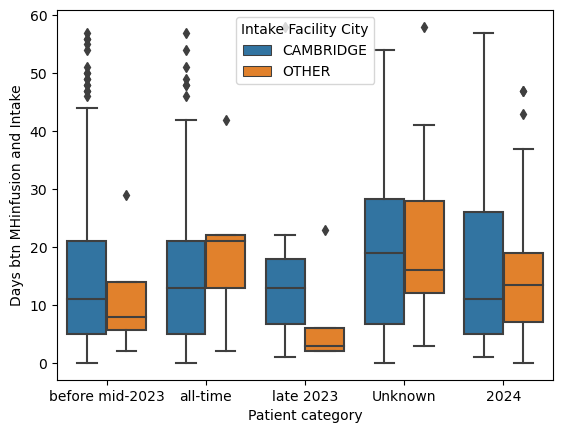

In [33]:
# Prepare the data 
## Select the required variables 
select_vars = ["Days btn MHinfusion and Intake", "Intake Facility City", "Patient category"]
select_df = df[select_vars]

## Remove outliers
select_df = remove_outliers(select_df, "Days btn MHinfusion and Intake")

# Plotting 
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue = "Intake Facility City",
            data=select_df)

* **Are people considering other facilities other than Cambridge? Are they specifically for MH infusions?**
    
    * **Visits outside cambridge and infusions outside cambridge** 
    * **What facility cities do intakes occur per each patient category**

# Conclusion

**Challenges**

- Not all patients in the records started with an intake. Some had no intakes in the appointment records. Also, theere are some patients that had other services before intake for instance chart#s 24 and 118
- It is cumbersome to focus this analysis on cambridge since some patients visited cambridge and other facilities for instance chart# 2194. - Fix this by counting the number of visits and infusions outside the Cambridge facility.
-

**Open Questions**

- Do you have an alternative to MH infusion that patients can prefer. I want to know this so that I can see how it compares with MH infusions over time. And from your end also find if there is a notable difference.... 
- 